In [3]:
import pandas as pd

# Assuming the data is in a file named 'data.csv'
df = pd.read_csv('maracoos_01-20240124T1612-trajectory-raw-delayed_b9a8_a85c_b204.csv')

# Filter out rows with any NaN values
df_filtered = df.dropna()

# Save the filtered data to a new CSV file
df_filtered.to_csv('filtered_data.csv', index=False)



/tmp/ipykernel_11565/1231038970.py:4: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('maracoos_01-20240124T1612-trajectory-raw-delayed_b9a8_a85c_b204.csv')


In [8]:
import pandas as pd
import utm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the CSV file, skipping the first row which contains the unwanted headers
df = pd.read_csv('filtered_data.csv', skiprows=1)

# Function to convert lat/lon to UTM
def latlon_to_utm(lat, lon):
    utm_x, utm_y, zone_number, zone_letter = utm.from_latlon(lat, lon)
    return utm_x, utm_y

df



,UTC,degrees_north,degrees_east,m
0,2024-02-12T00:00:01Z,37.874901,-74.385144,7.731661
1,2024-02-12T00:00:03Z,37.874897,-74.385146,7.989708
2,2024-02-12T00:00:05Z,37.874892,-74.385148,8.376780
3,2024-02-12T00:00:07Z,37.874888,-74.385150,8.853174
4,2024-02-12T00:00:09Z,37.874884,-74.385152,9.111220
...,...,...,...,...
298968,2024-02-19T13:51:21Z,38.528206,-74.866225,0.168720
298969,2024-02-19T13:51:23Z,38.528201,-74.866220,0.138946
298970,2024-02-19T13:51:25Z,38.528196,-74.866215,0.019849
298971,2024-02-19T13:58:16Z,38.528033,-74.866095,0.000000


In [15]:
# Apply the conversion to the entire DataFrame
utm_coords = df.apply(lambda row: latlon_to_utm(row['degrees_north'], row['degrees_east']), axis=1)
df['utm_x'] = [coord[0] for coord in utm_coords]
df['utm_y'] = [coord[1] for coord in utm_coords]

# Prepare data for 3D plot
x = df['utm_x'].astype(float)
y = df['utm_y'].astype(float)
z = df['m'].astype(float)

array_data = df[['utm_x', 'utm_y', 'm']].to_numpy()


# Plotting the 3D trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(array_data[:1000,0], array_data[:1000,1], array_data[:1000,2], label='Trajectory')
ax.set_xlabel('UTM X')
ax.set_ylabel('UTM Y')
ax.set_zlabel('Depth (m)')
ax.set_title('3D Trajectory')
plt.legend()
plt.show()

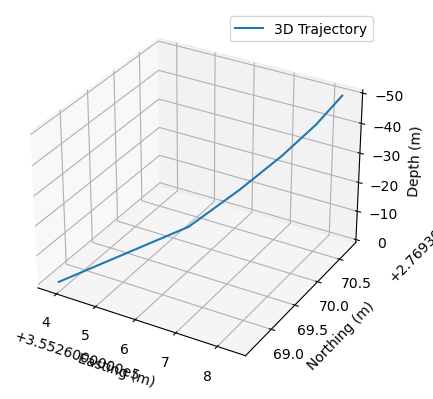

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj, transform

# Define initial coordinates (latitude, longitude)
initial_lat = 25.0330  # Example latitude
initial_lon = 121.5654  # Example longitude

# Define the UTM zone
utm_zone = 18  # Example UTM zone for Taipei, Taiwan
utm_proj = Proj(proj='utm', zone=utm_zone, ellps='WGS84')

# Convert initial lat/lon to UTM coordinates
initial_x, initial_y = utm_proj(initial_lon, initial_lat)

# Define time steps in seconds (e.g., [0, 1, 2, 3, ...])
time_steps = np.array([0, 1, 2, 3, 4, 5])  # Example time steps

# Define velocities in m/s (northward and eastward)
north_velocities = np.array([0.5, 0.6, 0.4, 0.3, 0.2, 0.1])  # Example values
east_velocities = np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5])  # Example values
depth = np.array([0, 10, 20, 30, 40, 50])  # Example depth in meters

# Calculate displacements
north_displacements = np.cumsum(north_velocities) * np.diff(time_steps, prepend=0)
east_displacements = np.cumsum(east_velocities) * np.diff(time_steps, prepend=0)

# Calculate UTM coordinates over time
x_coords = initial_x + east_displacements
y_coords = initial_y + north_displacements
z_coords = depth  # Assuming depth is negative

# Plot the 3D trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_coords, y_coords, -z_coords, label='3D Trajectory')  # Negate z for depth
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_zlabel('Depth (m)')
ax.invert_zaxis()  # Invert z-axis to show depth downwards
ax.legend()
plt.show()
